## Unsupervised Learning_R5_Casestudy1_CarMpg

###### Case Study-1
The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 
Dataset: cars-dataset
Attribute Information:
Car Name – Name of the car
Cyl – No of cylinders in the car – Multivalued discrete
Disp – Displacement – continuous
Hp – Horsepower – continuous
Wt – Weight – continuous
Acc – Accleration – continuous
Yr – Model of the car – Multivalued discrete
Steps to follow:
1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
# Import library
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy.stats import zscore

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Data Load - Case Study 1
df_cars = pd.read_csv('cars-dataset.csv')
df_cars.rename(columns={'car name':'car_name'},inplace=True)
df_cars.sample(3)

,car_name,cyl,disp,hp,wt,acc,yr,mpg
304,fiat strada custom,4,91.0,69,2130,14.7,79,37.3
55,volkswagen model 111,4,97.0,60,1834,19.0,71,27.0
81,datsun 510 (sw),4,97.0,92,2288,17.0,72,28.0


### Case Study 1

In [3]:
# EDA
df_cars.dtypes

car_name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

    'hp' column is of object data type. need to check the unique values in the column to confirm any non numeric values 
    present

In [4]:
df_cars.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

    '?' value may be contributing to the data type  being called object

In [5]:
df_cars[df_cars['hp']=='?']

,car_name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [6]:
print('Shape of dataset: ',df_cars.shape)
print('Unique cars in the dataset: ',len(df_cars['car_name'].unique()))

Shape of dataset:  (398, 8)
Unique cars in the dataset:  305


In [7]:
df_ucarcount = pd.DataFrame(df_cars.groupby(by='car_name').count().iloc[:,0-1])
df_ucarcount.rename(columns={'mpg':'count'})
df_ucarcount

,count
car_name,
amc ambassador brougham,1
amc ambassador dpl,1
amc ambassador sst,1
amc concord,2
amc concord d/l,1
amc concord dl,1
amc concord dl 6,1
amc gremlin,4
amc hornet,4


,mpg
car_name,
amc ambassador brougham,1
amc ambassador dpl,1
amc ambassador sst,1
amc concord,2
amc concord d/l,1
amc concord dl,1
amc concord dl 6,1
amc gremlin,4
amc hornet,4


In [8]:
# Finding out if there is another row for the above cars with ? for hp value
cars_nohp = df_cars[df_cars['hp']=='?']['car_name']

In [9]:
cars_nohp

32               ford pinto
126           ford maverick
330    renault lecar deluxe
336      ford mustang cobra
354             renault 18i
374          amc concord dl
Name: car_name, dtype: object

In [10]:
df_cars.query('car_name in @cars_nohp')
index = df_cars.query('hp in \'?\'').index

,car_name,cyl,disp,hp,wt,acc,yr,mpg
17,ford maverick,6,200.0,85,2587,16.0,70,21.0
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
100,ford maverick,6,250.0,88,3021,16.5,73,18.0
112,ford pinto,4,122.0,85,2310,18.5,73,19.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
130,ford pinto,4,122.0,80,2451,16.5,74,26.0
155,ford maverick,6,250.0,72,3158,19.5,75,15.0
168,ford pinto,4,140.0,83,2639,17.0,75,23.0
174,ford pinto,6,171.0,97,2984,14.5,75,18.0
193,ford maverick,6,200.0,81,3012,17.6,76,24.0


    Ford Maverick and Ford Pinto have HP values in some rows. But when we check other values like year (yr), displacement (disp) and cylinder (cyl) of those cars with the one that has ? in hp they differ.
    Hence it is best to remove all rows that has ? for hp column as we cannot use them for our analysis

In [11]:
print('Before')
df_cars.shape
df_cars.drop(index=index,inplace=True)
print('After')
df_cars.shape

Before


(398, 8)

After


(392, 8)

In [12]:
# Changing the datatype of hp to integer
df_cars.hp = df_cars.hp.astype(int)

In [13]:
df_cars.dtypes

car_name     object
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

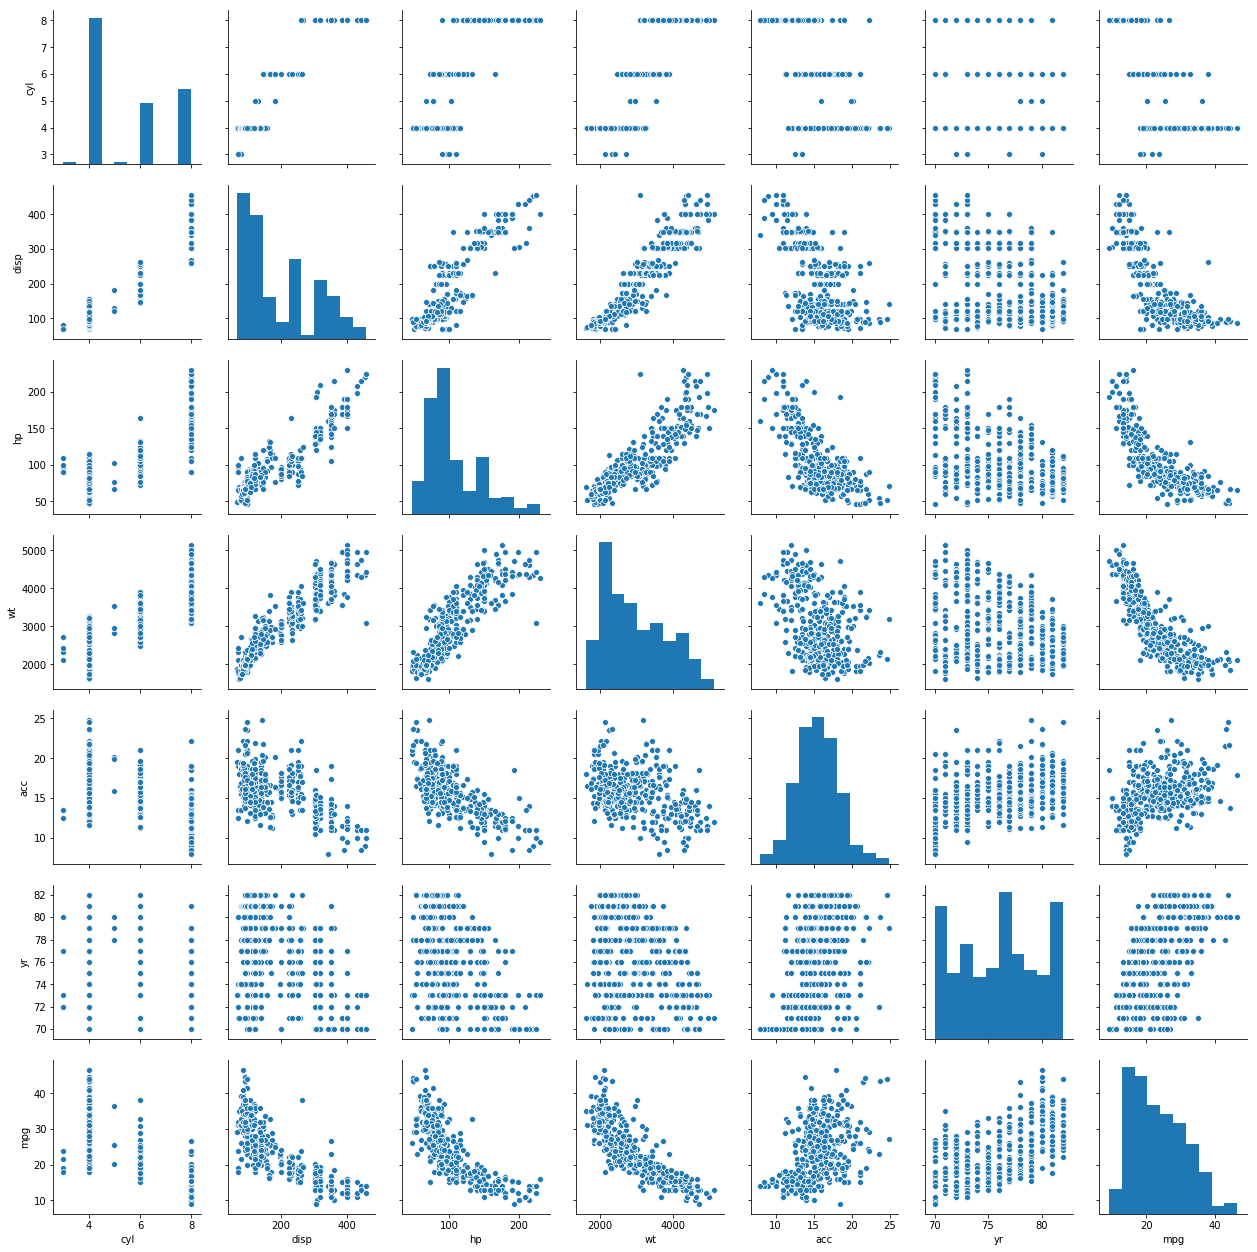

In [14]:
# Pair plot matrix
sns.pairplot(df_cars)

Scatter Plot Analysis

    1) MPG column looks negatively correlated to Displacement, HP and Weight columns, which makes more sense in real world 
    term
    2) Displacement, HP and Weight columns are positively correlated with each other
    3) Even though the correlation between MPG and Years columns is weakly positive the general trend is with increase in 
    Year value the MPG value shows increase. This denotes that the general trend in companies is they have adopted to more 
    fuel saving techniques with the latest cars
    4) HP, Displacement and Weight shows a positive correlation with number of cylinders

In [15]:
# Correlation matrix
corr = df_cars.corr()
# Displaying only the upper traingle of correlation matrix
ut = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
ut

,cyl,disp,hp,wt,acc,yr,mpg
cyl,NaN,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,NaN,NaN,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,NaN,NaN,NaN,0.864538,-0.689196,-0.416361,-0.778427
wt,NaN,NaN,NaN,NaN,-0.416839,-0.309120,-0.832244
acc,NaN,NaN,NaN,NaN,NaN,0.290316,0.423329
yr,NaN,NaN,NaN,NaN,NaN,NaN,0.580541
mpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation matrix above denotes same behaviour as expressed in pair plot

In [16]:
# Dropping car_name column as it is not going to help us in predicting MPG
df_cars.drop('car_name',axis=1,inplace=True)
df_cars.sample(2)

,cyl,disp,hp,wt,acc,yr,mpg
248,4,91.0,60,1800,16.4,78,36.1
79,4,96.0,69,2189,18.0,72,26.0


In [17]:
# Splitting dependent and independent variables
X = df_cars.drop('mpg',axis=1)
y = df_cars['mpg']

In [18]:
# Data normalization by z score
X_z = X.apply(zscore)

K Means Clustering

In [19]:
# Finding the optimal number of clusters
clusters=range(1,10)
meanDistortions=[]

In [20]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_z)
    prediction=model.predict(X_z)
    meanDistortions.append(sum(np.min(cdist(X_z,model.cluster_centers_,'euclidean'),axis=1)) / X_z.shape[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

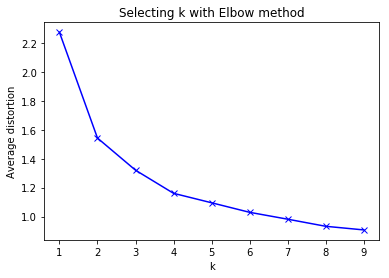

In [21]:
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with Elbow method');

k value of 4 looks optimal where the variance change has tapered

In [22]:
final_model = KMeans(4)
final_model.fit(X_z)
prediction = final_model.predict(X_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
labels = final_model.predict(X_z)
centroids = final_model.cluster_centers_

In [24]:
X_z['Group'] = prediction
X_z['mpg'] = y

In [25]:
# Clusters Data Representation
X_z.sample(10)

,cyl,disp,hp,wt,acc,yr,Group,mpg
326,-0.864014,-0.999058,-1.468949,-0.757480,2.961037,1.092789,0,43.4
392,-0.864014,-0.415384,-0.376395,-0.032516,0.638278,1.636410,0,27.0
175,-0.864014,-0.999058,-0.896659,-1.226643,-0.559396,-0.266263,2,29.0
299,-0.864014,-0.511068,-0.870646,0.250396,3.360262,0.820978,0,27.2
108,-0.864014,-0.932079,-0.428421,-0.823493,1.255261,-0.809884,2,20.0
238,-0.864014,-0.922511,-0.558487,-1.063969,0.130174,0.277358,0,33.5
325,-0.864014,-0.999058,-1.468949,-1.052181,2.235175,1.092789,0,44.3
47,0.309967,0.531890,-0.116263,0.358846,-0.196464,-1.353505,3,19.0
360,0.309967,-0.472795,-0.740580,0.215032,1.473019,1.364599,0,30.7
86,1.483947,1.048584,1.184397,0.818579,-1.466724,-0.809884,1,14.0


In [26]:
# Seperating clustered datas in to different dataframes
c1 = X_z[X_z.Group==0]
c2 = X_z[X_z.Group==1]
c3 = X_z[X_z.Group==2]
c4 = X_z[X_z.Group==3]

In [27]:
c1.shape
c2.shape
c3.shape
c4.shape

(118, 8)

(94, 8)

(93, 8)

(87, 8)

In [28]:
X_c1 = c1.drop('mpg',axis=1)
y_c1 = c1['mpg']

X_train,X_test,y_train,y_test = train_test_split(X_c1,y_c1,test_size=0.2,random_state=99)

In [29]:
# Cluster 1 model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
c1_coeff = regr.coef_
print('Cluster 1 Coefficient: ',c1_coeff)
print('Cluster 1 Mean Squared Error: ',mean_squared_error(y_test,prediction))
print('Train Model Score: ', regr.score(X_train,y_train))
print('Test Model Score: ',regr.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cluster 1 Coefficient:  [ 1.92587341 -6.4004087  -5.99974951 -2.20020179 -0.40261164  3.45092249
  0.        ]
Cluster 1 Mean Squared Error:  9.00131360383
Train Model Score:  0.595663937738
Test Model Score:  0.750041502492


In [30]:
X_c2 = c2.drop('mpg',axis=1)
y_c2 = c2['mpg']

X_train,X_test,y_train,y_test = train_test_split(X_c2,y_c2,test_size=0.2,random_state=99)

In [31]:
# Cluster 2 model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
c2_coeff = regr.coef_
print('Cluster 2 Coefficient: ',c2_coeff)
print('Cluster 2 Mean Squared Error: ',mean_squared_error(y_test,prediction))
print('Train Model Score: ', regr.score(X_train,y_train))
print('Test Model Score: ',regr.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cluster 2 Coefficient:  [ 0.         -1.24252707 -0.34005381 -0.74166505 -1.57359973  1.48839449
  0.        ]
Cluster 2 Mean Squared Error:  1.70528700501
Train Model Score:  0.520238155941
Test Model Score:  0.598528343392


In [32]:
X_c3 = c3.drop('mpg',axis=1)
y_c3 = c3['mpg']

X_train,X_test,y_train,y_test = train_test_split(X_c3,y_c3,test_size=0.2,random_state=99)

In [33]:
# Cluster 3 model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
c3_coeff = regr.coef_
print('Cluster 3 Coefficient: ',c3_coeff)
print('Cluster 3 Mean Squared Error: ',mean_squared_error(y_test,prediction))
print('Train Model Score: ', regr.score(X_train,y_train))
print('Test Model Score: ',regr.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cluster 3 Coefficient:  [ 2.17484461 -6.83881779 -2.72894519 -3.36914328 -1.40527943  0.56772916
  0.        ]
Cluster 3 Mean Squared Error:  13.7307744729
Train Model Score:  0.724773255987
Test Model Score:  0.0207804060242


In [34]:
X_c4 = c4.drop('mpg',axis=1)
y_c4 = c4['mpg']

X_train,X_test,y_train,y_test = train_test_split(X_c4,y_c4,test_size=0.2,random_state=99)

In [35]:
# Cluster 4 model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
c4_coeff = regr.coef_
print('Cluster 4 Coefficient: ',c4_coeff)
print('Cluster 4 Mean Squared Error: ',mean_squared_error(y_test,prediction))
print('Train Model Score: ', regr.score(X_train,y_train))
print('Test Model Score: ',regr.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cluster 4 Coefficient:  [ 0.85851199  1.04651874 -1.54099034 -2.96415831 -1.20891706  2.85784147
  0.        ]
Cluster 4 Mean Squared Error:  3.9326025026
Train Model Score:  0.491965748853
Test Model Score:  0.402354061811


In [36]:
# Regression model on complete data set
X = df_cars.drop('mpg',axis=1)
y = df_cars['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
cars_coeff = regr.coef_
print('df_cars Coefficient: ',cars_coeff)
print('df_cars Mean Squared Error: ',mean_squared_error(y_test,prediction))
print('Train Model Score: ', regr.score(X_train,y_train))
print('Test Model Score: ',regr.score(X_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

df_cars Coefficient:  [ -2.83751603e-01  -6.89265069e-04   2.03632837e-03  -5.96276867e-03
   3.54770258e-02   7.60466530e-01]
df_cars Mean Squared Error:  13.1019273619
Train Model Score:  0.813296942326
Test Model Score:  0.786996480662


##    Dataset-----------------Train Score/Test Score----------------MSE
    Complete----------------81.32% / 78.69%-----------------------13.10
    Cluster1----------------59.50% / 75.00%------------------------9.00
    Cluster2----------------52.02% / 59.85%------------------------1.70
    Cluster3----------------72.04% / 2.07%-------------------------13.73
    Cluster4----------------49.19% / 40.23%------------------------3.93
    
    
    Model score is getting degraded with clusters in place. Especially cluster 3 has a train score of 72% while test
    score of 2%. This denotes overfitting due to bias.
    Clusters may have caused this bias
    
    Fitting the complete dataset on the linear regression model gives a score of 78% on test and 81% on train 
    explaining the bias caused by clustering